In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/hanksville.csv'
temp_df = pd.read_csv(url,usecols=['DATE','PRCP','TMAX','TMIN','TOBS'])
temp_df.head()

,DATE,PRCP,TMAX,TMIN,TOBS
0,2000-01-01,0.02,43.0,21.0,28.0
1,2000-01-02,0.03,39.0,24.0,24.0
2,2000-01-03,0.00,39.0,7.0,18.0
3,2000-01-04,0.00,39.0,5.0,25.0
4,2000-01-05,0.00,44.0,10.0,22.0


In [10]:
def tweak_df(df_):
    return (df_
    .assign(DATE=pd.to_datetime(df_['DATE'])
    .dt. tz_localize ('US/Mountain', ambiguous = False ))
    )



In [11]:
temp_df = tweak_df(temp_df)
temp_df.head()

,DATE,PRCP,TMAX,TMIN,TOBS
0,2000-01-01 00:00:00-07:00,0.02,43.0,21.0,28.0
1,2000-01-02 00:00:00-07:00,0.03,39.0,24.0,24.0
2,2000-01-03 00:00:00-07:00,0.00,39.0,7.0,18.0
3,2000-01-04 00:00:00-07:00,0.00,39.0,5.0,25.0
4,2000-01-05 00:00:00-07:00,0.00,44.0,10.0,22.0


In [12]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/dirtydevil.txt'
df = pd.read_csv(url,skiprows=lambda x: x<34 or x ==35 ,sep ='\t')
df.head()

/var/folders/pg/zck9hy351gbfrqfqp_z4gb1m0000gn/T/ipykernel_2260/633917389.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,skiprows=lambda x: x<34 or x ==35 ,sep ='\t')


,agency_cd,site_no,datetime,tz_cd,144166_00060,144166_00060_cd,144167_00065,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00,MDT,71.0,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15,MDT,71.0,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30,MDT,71.0,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45,MDT,70.0,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00,MDT,70.0,A:[91],NaN,NaN


In [29]:
def to_us_mountain_time (df_ , time_col , tz_col ):
    return (df_
. assign (**{ tz_col : df_[ tz_col ]. replace ('MDT','MST7MDT')})
. groupby ( tz_col )
[ time_col ]
. transform ( lambda s: pd. to_datetime (s)
.dt.tz_localize (s.name , ambiguous = True )
.dt.tz_convert ('US/Mountain'))
)


def tweak_river (df_ ):
    return (df_
. assign ( datetime = to_us_mountain_time (df_ , 'datetime', 'tz_cd'))
. rename ( columns ={ '144166_00060': 'cfs','144167_00065': 'gage_height'}))

In [30]:
dd = tweak_river(df)
dd.head()

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00:00-06:00,MDT,71.0,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15:00-06:00,MDT,71.0,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30:00-06:00,MDT,71.0,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45:00-06:00,MDT,70.0,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00:00-06:00,MDT,70.0,A:[91],NaN,NaN


In [16]:
# Join the two dataframes
(dd
.merge(temp_df, left_on='datetime',right_on='DATE')
)

,agency_cd,site_no,datetime,tz_cd,144166_00060,144166_00060_cd,144167_00065,144167_00065_cd,DATE,PRCP,TMAX,TMIN,TOBS
0,USGS,9333500,2001-05-08 00:00:00-06:00,MDT,75.00,A:[91],NaN,NaN,2001-05-08 00:00:00-06:00,0.0,85.0,43.0,58.0
1,USGS,9333500,2001-05-09 00:00:00-06:00,MDT,64.00,A:[91],NaN,NaN,2001-05-09 00:00:00-06:00,0.0,92.0,36.0,64.0
2,USGS,9333500,2001-05-10 00:00:00-06:00,MDT,54.00,A:[91],NaN,NaN,2001-05-10 00:00:00-06:00,0.0,92.0,50.0,67.0
3,USGS,9333500,2001-05-11 00:00:00-06:00,MDT,56.00,A:[91],NaN,NaN,2001-05-11 00:00:00-06:00,0.0,87.0,46.0,60.0
4,USGS,9333500,2001-05-12 00:00:00-06:00,MDT,49.00,A:[91],NaN,NaN,2001-05-12 00:00:00-06:00,0.0,93.0,45.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,USGS,9333500,2020-09-20 00:00:00-06:00,MDT,6.04,P,6.04,P,2020-09-20 00:00:00-06:00,0.0,92.0,46.0,83.0
4969,USGS,9333500,2020-09-21 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-21 00:00:00-06:00,0.0,92.0,47.0,84.0
4970,USGS,9333500,2020-09-22 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-22 00:00:00-06:00,0.0,84.0,54.0,77.0
4971,USGS,9333500,2020-09-23 00:00:00-06:00,MDT,7.68,P,6.10,P,2020-09-23 00:00:00-06:00,0.0,91.0,47.0,87.0


In [22]:
# join on a Date

(dd.
groupby(pd.Grouper(key='datetime', freq='D'))
.median()
.merge(temp_df, right_on='DATE',left_index=True,how='inner',validate='1:1')

)

,site_no,144166_00060,144167_00065,DATE,PRCP,TMAX,TMIN,TOBS
492,9333500.0,71.50,NaN,2001-05-07 00:00:00-06:00,0.0,82.0,41.0,55.0
493,9333500.0,69.00,NaN,2001-05-08 00:00:00-06:00,0.0,85.0,43.0,58.0
494,9333500.0,63.50,NaN,2001-05-09 00:00:00-06:00,0.0,92.0,36.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00-06:00,0.0,92.0,50.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00-06:00,0.0,87.0,46.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.83,6.07,2020-09-20 00:00:00-06:00,0.0,92.0,46.0,83.0
6844,9333500.0,6.83,6.07,2020-09-21 00:00:00-06:00,0.0,92.0,47.0,84.0
6845,9333500.0,7.39,6.09,2020-09-22 00:00:00-06:00,0.0,84.0,54.0,77.0
6846,9333500.0,7.97,6.11,2020-09-23 00:00:00-06:00,0.0,91.0,47.0,87.0


/var/folders/pg/zck9hy351gbfrqfqp_z4gb1m0000gn/T/ipykernel_2260/910627393.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  (dd


Text(0.5, 0.98, 'Dirty devil river metrics(15 day rolling mean)')

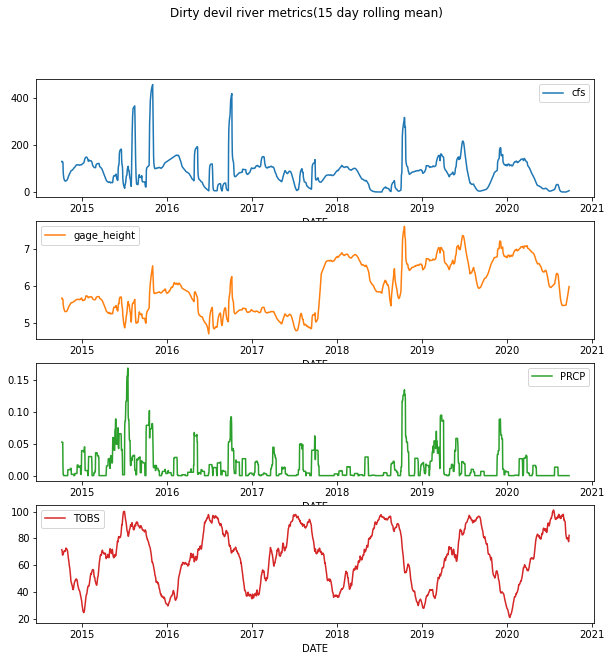

In [47]:
# Visulaize the data for 2014 for these columns ' cfs ', 'gage_height ', 'PRCP ', 'TOBS '
fig ,ax = plt.subplots(figsize=(10,10))
(dd
.groupby(pd.Grouper(key='datetime', freq='D'))
.median()
.merge(temp_df, right_on='DATE',left_index=True,how='inner',validate='1:1')
.set_index('DATE')
.loc['2014':,['cfs', 'gage_height', 'PRCP', 'TOBS']]
.interpolate()
.rolling(15)
.mean()
.plot(figsize=(12,6),ax=ax,subplots=True)
)
fig.suptitle('Dirty devil river metrics(15 day rolling mean)')
# plt.show()